In [2]:
import sys
sys.path.append('../..')
from lib_train import *
%matplotlib inline

{'sampling_rate': 16000, 'duration': 1, 'hop_length': 253, 'fmin': 20, 'fmax': 8000, 'n_mels': 64, 'n_fft': 1280, 'labels': ['AfricanPiedWagtail', 'BarnSwallow', 'BlackWoodpecker', 'BlackheadedGull', 'CanadaGoose', 'CarrionCrow', 'CoalTit', 'CommonBlackbird', 'CommonChaffinch', 'CommonChiffchaff', 'CommonCuckoo', 'CommonHouseMartin', 'CommonLinnet', 'CommonMoorhen', 'CommonNightingale', 'CommonPheasant', 'CommonRedpoll', 'CommonRedshank', 'CommonRedstart', 'CommonReedBunting', 'CommonSnipe', 'CommonStarling', 'CommonSwift', 'CommonWhitethroat', 'CommonWoodPigeon', 'CornBunting', 'Dunlin', 'Dunnock', 'EurasianBlackcap', 'EurasianBlueTit', 'EurasianBullfinch', 'EurasianCollaredDove', 'EurasianCoot', 'EurasianGreenfinch', 'EurasianJay', 'EurasianMagpie', 'EurasianNuthatch', 'EurasianOystercatcher', 'EurasianReedWarbler', 'EurasianSkylark', 'EurasianTreeSparrow', 'EurasianTreecreeper', 'EurasianWren', 'EurasianWryneck', 'EuropeanBeeEater', 'EuropeanGoldenPlover', 'EuropeanGoldfinch', 'Euro

Using TensorFlow backend.


In [3]:
DATAROOT = Path('./data/data')
data_files = list(DATAROOT.glob('*/*.wav'))
data_files

[PosixPath('data/data/CommonChaffinch/xc121597.wav'),
 PosixPath('data/data/CommonChaffinch/xc42803.wav'),
 PosixPath('data/data/CommonChaffinch/xc122548.wav'),
 PosixPath('data/data/WesternYellowWagtail/xc69792.wav'),
 PosixPath('data/data/WesternYellowWagtail/xc102788.wav'),
 PosixPath('data/data/WesternYellowWagtail/xc36637.wav'),
 PosixPath('data/data/Dunlin/xc64738.wav'),
 PosixPath('data/data/Dunlin/xc83894.wav'),
 PosixPath('data/data/Dunlin/xc118363.wav'),
 PosixPath('data/data/Yellowhammer/xc102107.wav'),
 PosixPath('data/data/Yellowhammer/xc102106.wav'),
 PosixPath('data/data/Yellowhammer/xc145533.wav'),
 PosixPath('data/data/WillowPtarmigan/xc71943.wav'),
 PosixPath('data/data/WillowPtarmigan/xc130283.wav'),
 PosixPath('data/data/WillowPtarmigan/xc149806.wav'),
 PosixPath('data/data/EuropeanRobin/xc70124.wav'),
 PosixPath('data/data/EuropeanRobin/xc133862.wav'),
 PosixPath('data/data/EuropeanRobin/xc30390.wav'),
 PosixPath('data/data/LongTailedTit/xc128853.wav'),
 PosixPath(

In [8]:
# 1. generate XX and y
XX = mels_build_multiplexed_X(conf, data_files)
y, _, _ = generate_y_from_pathname(data_files)

# 2. flatten (= unseen data is not available) & shuffle by train_test_split
X, y = mels_demux_XX_y(XX, y) # demultiplex = flatten
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=conf.test_size, random_state=conf.random_state)

# 3. write all sets as files
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

print('Training set has {} samples. X shape is {}'.format(len(X_train), X_train.shape))
print('Test set has {} samples. X shape is {}'.format(len(X_test), X_test.shape))

Set labels to config.py; conf.labels = ['AfricanPiedWagtail', 'BarnSwallow', 'BlackWoodpecker', 'BlackheadedGull', 'CanadaGoose', 'CarrionCrow', 'CoalTit', 'CommonBlackbird', 'CommonChaffinch', 'CommonChiffchaff', 'CommonCuckoo', 'CommonHouseMartin', 'CommonLinnet', 'CommonMoorhen', 'CommonNightingale', 'CommonPheasant', 'CommonRedpoll', 'CommonRedshank', 'CommonRedstart', 'CommonReedBunting', 'CommonSnipe', 'CommonStarling', 'CommonSwift', 'CommonWhitethroat', 'CommonWoodPigeon', 'CornBunting', 'Dunlin', 'Dunnock', 'EurasianBlackcap', 'EurasianBlueTit', 'EurasianBullfinch', 'EurasianCollaredDove', 'EurasianCoot', 'EurasianGreenfinch', 'EurasianJay', 'EurasianMagpie', 'EurasianNuthatch', 'EurasianOystercatcher', 'EurasianReedWarbler', 'EurasianSkylark', 'EurasianTreeSparrow', 'EurasianTreecreeper', 'EurasianWren', 'EurasianWryneck', 'EuropeanBeeEater', 'EuropeanGoldenPlover', 'EuropeanGoldfinch', 'EuropeanGreenWoodpecker', 'EuropeanHerringGull', 'EuropeanHoneyBuzzard', 'EuropeanNightja

In [9]:
[a.shape for a in [XX, y, X_train, X_test, y_train, y_test]]

[(264, 30, 64, 64, 1),
 (7920,),
 (6336, 64, 64, 1),
 (1584, 64, 64, 1),
 (6336,),
 (1584,)]

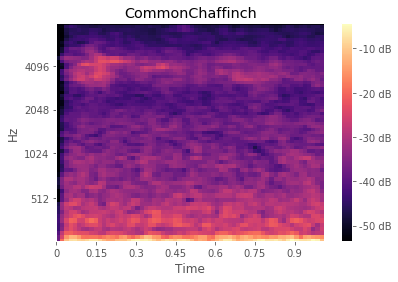

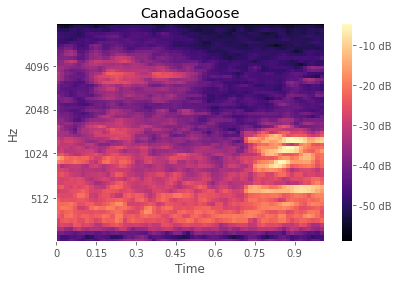

In [10]:
show_melspectrogram(conf, XX[0, 0, :, :, -1], title=conf.labels[y[0]])
show_melspectrogram(conf, X_train[0, :, :, -1], title=conf.labels[y_train[0]])

In [11]:
print(conf.labels)

['AfricanPiedWagtail', 'BarnSwallow', 'BlackWoodpecker', 'BlackheadedGull', 'CanadaGoose', 'CarrionCrow', 'CoalTit', 'CommonBlackbird', 'CommonChaffinch', 'CommonChiffchaff', 'CommonCuckoo', 'CommonHouseMartin', 'CommonLinnet', 'CommonMoorhen', 'CommonNightingale', 'CommonPheasant', 'CommonRedpoll', 'CommonRedshank', 'CommonRedstart', 'CommonReedBunting', 'CommonSnipe', 'CommonStarling', 'CommonSwift', 'CommonWhitethroat', 'CommonWoodPigeon', 'CornBunting', 'Dunlin', 'Dunnock', 'EurasianBlackcap', 'EurasianBlueTit', 'EurasianBullfinch', 'EurasianCollaredDove', 'EurasianCoot', 'EurasianGreenfinch', 'EurasianJay', 'EurasianMagpie', 'EurasianNuthatch', 'EurasianOystercatcher', 'EurasianReedWarbler', 'EurasianSkylark', 'EurasianTreeSparrow', 'EurasianTreecreeper', 'EurasianWren', 'EurasianWryneck', 'EuropeanBeeEater', 'EuropeanGoldenPlover', 'EuropeanGoldfinch', 'EuropeanGreenWoodpecker', 'EuropeanHerringGull', 'EuropeanHoneyBuzzard', 'EuropeanNightjar', 'EuropeanRobin', 'EuropeanTurtleDov